In [63]:
import sys
import platform
import importlib

if platform.system() == 'Darwin':  # macOS
    base_FP = '/Users/hyunglokkim/Insync/hkim@geol.sc.edu/Google_Drive'
    cpuserver_data_FP = '/Users/hyunglokkim/cpuserver_data'
else:
    base_FP = '/data'
    cpuserver_data_FP = '/data'
sys.path.append(base_FP + '/python_modules')

#hydroAI libs
import HydroAI.HLS as HLS
import HydroAI.Plot as Plot
importlib.reload(HLS);
importlib.reload(Plot);

In [44]:
target_date = '2022.01.10'
base_folder = '/Users/hyunglokkim/cpuserver_data/HLS/Juam/S30/'+target_date

In [27]:
# Example usage to get any band values and lon/lat data:
s2_reader = HLS.SentinelBandReader(base_folder)

# Access different bands
red_data = s2_reader.red  # Red band
nir_data = s2_reader.nir  # Near-infrared band
swir1_data = s2_reader.swir1  # Short-wave infrared 1
qa_data = s2_reader.qa  # QA band
lon, lat = s2_reader.get_lat_lon_arrays('red')

print("Red Band Data:")
print(red_data)
print("Longitude Data:")
print(lon)

Red Band Data:
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]
Longitude Data:
[[126.802609   126.80291031 126.80321162 ... 128.01959859 128.0198999
  128.02020121]
 [126.802609   126.80291031 126.80321162 ... 128.01959859 128.0198999
  128.02020121]
 [126.802609   126.80291031 126.80321162 ... 128.01959859 128.0198999
  128.02020121]
 ...
 [126.802609   126.80291031 126.80321162 ... 128.01959859 128.0198999
  128.02020121]
 [126.802609   126.80291031 126.80321162 ... 128.01959859 128.0198999
  128.02020121]
 [126.802609   126.80291031 126.80321162 ... 128.01959859 128.0198999
  128.02020121]]


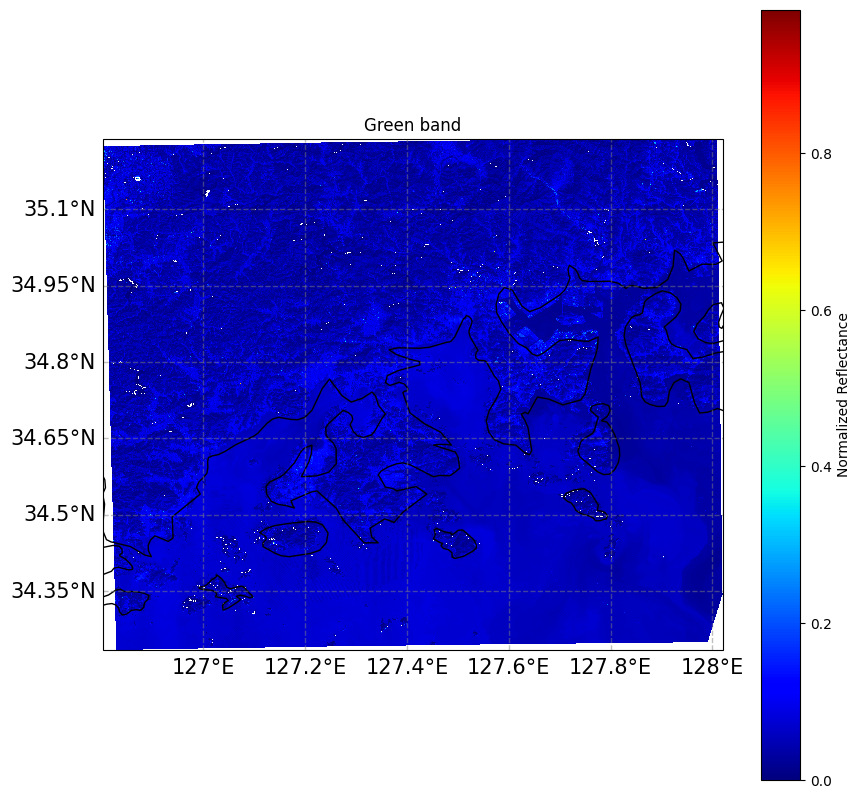

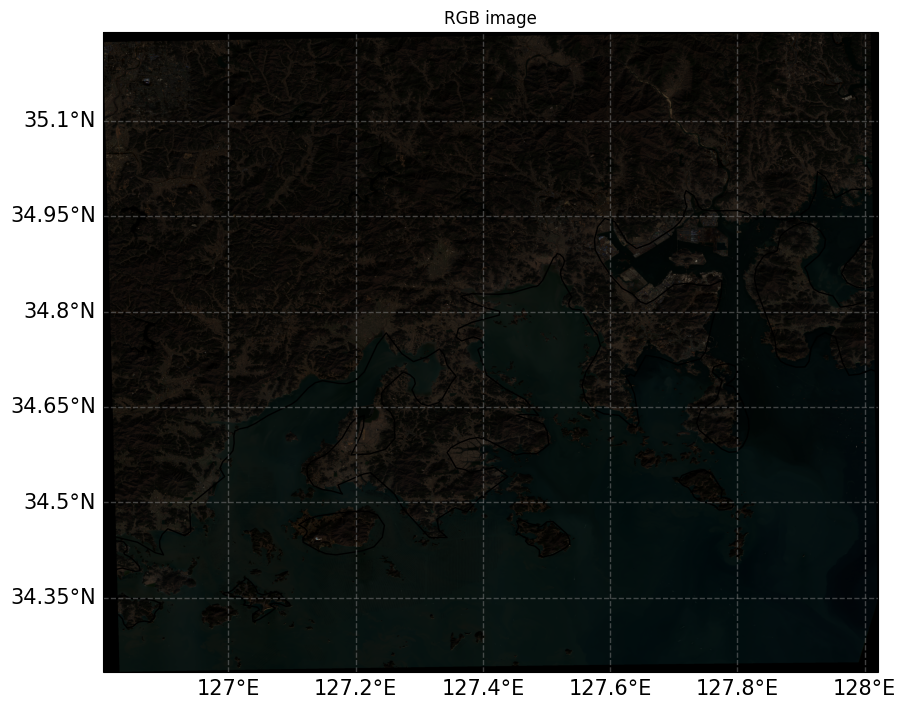

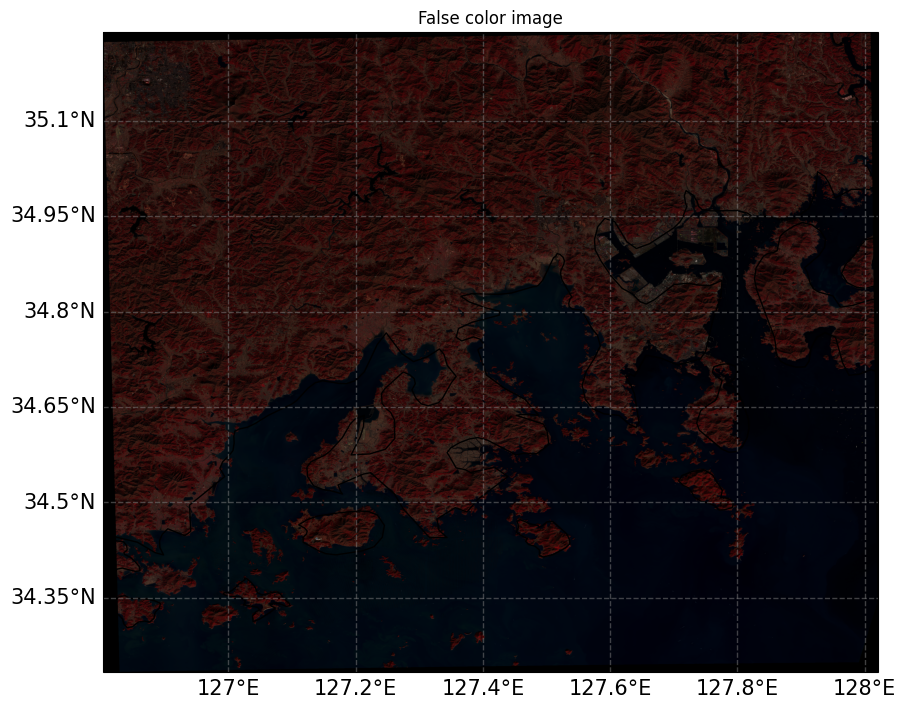

In [35]:
# Example usage to plot an individual band or RGB image
importlib.reload(HLS);
s2_reader = HLS.SentinelBandReader(base_folder)
s2_plotter = HLS.SentinelBandPlotter(s2_reader)
s2_plotter.plot_band('green', 'jet', 'Green band')
s2_plotter.plot_rgb('RGB image')
s2_plotter.plot_false_color('False color image')

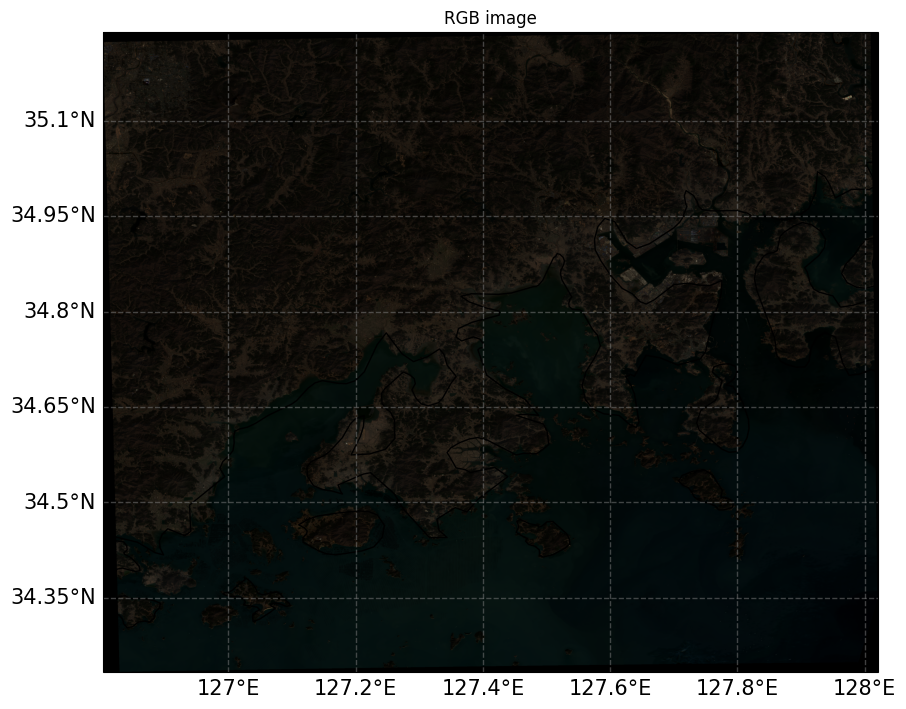

In [59]:
# Example usage to calculate an water body index
target_date = '2022.02.03'
base_folder = '/Users/hyunglokkim/cpuserver_data/HLS/Juam/S30/'+target_date
s2_reader = HLS.SentinelBandReader(base_folder)
water_indices_calculator = HLS.WaterIndicesCalculator(s2_reader)
mndwi, transform = water_indices_calculator.calculate_mndwi()

s2_plotter = HLS.SentinelBandPlotter(s2_reader)
s2_plotter.plot_rgb('RGB image')

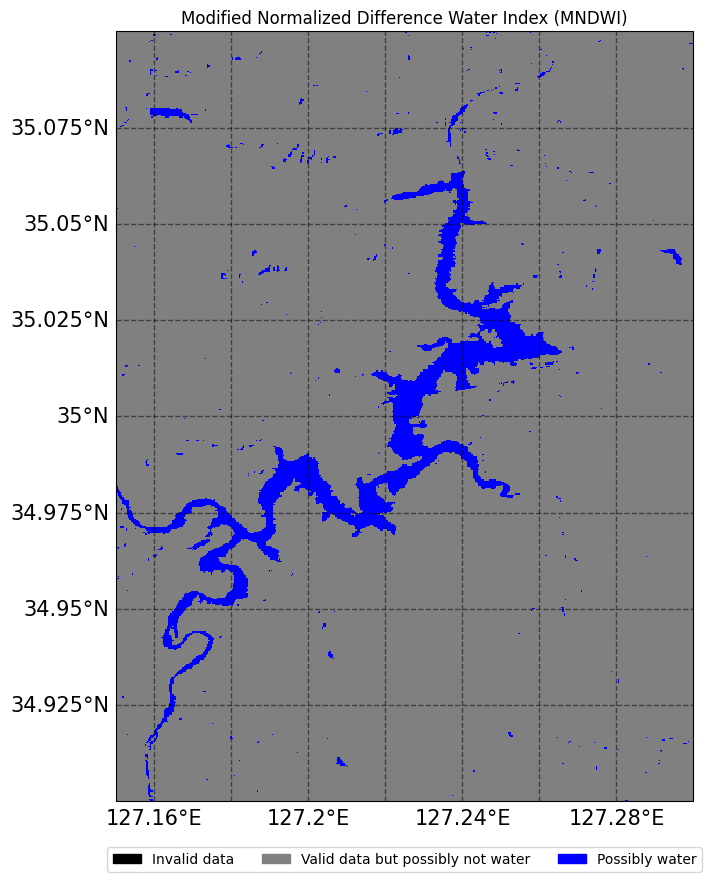

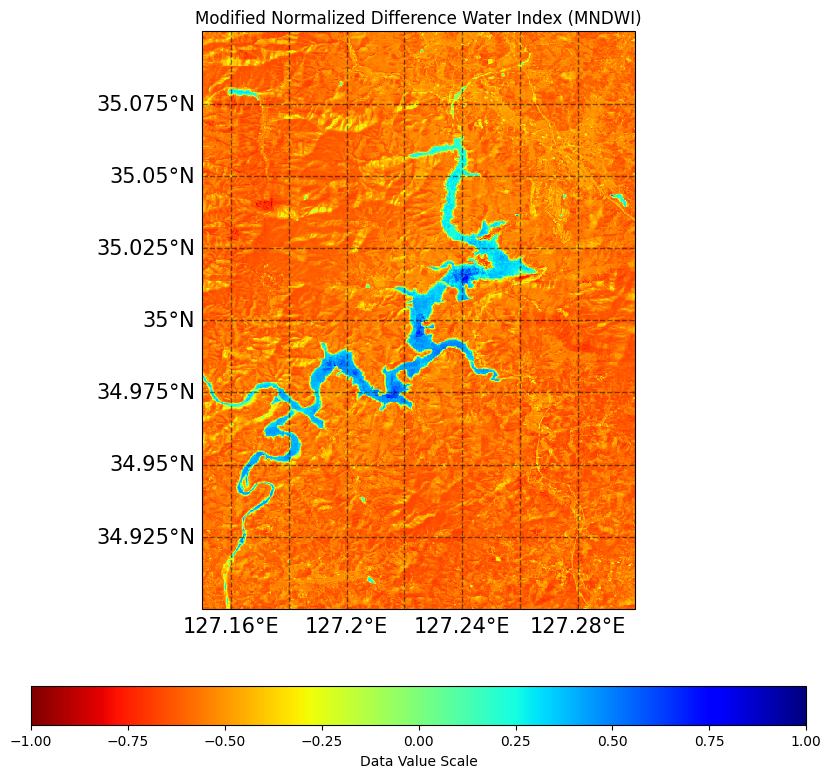

In [60]:
# Example uses to plot the water body index with threshold or raw values 
#bounds = [38.895, 39.445, 21.005, 21.995]
#Juam
bounds = [127.15, 127.3, 34.9, 35.1]
# with a threshold
s2_plotter.plot_index(mndwi, transform, threshold=-0.3, title='Modified Normalized Difference Water Index (MNDWI)', bounds = bounds)
# without a threshold
s2_plotter.plot_index(mndwi, transform, title='Modified Normalized Difference Water Index (MNDWI)', cmap='jet_r', bounds = bounds)

In [61]:
mndwi

(3337, 4042)

In [62]:
lat

array([[35.23886693, 35.23886693, 35.23886693, ..., 35.23886693,
        35.23886693, 35.23886693],
       [35.23856562, 35.23856562, 35.23856562, ..., 35.23856562,
        35.23856562, 35.23856562],
       [35.23826431, 35.23826431, 35.23826431, ..., 35.23826431,
        35.23826431, 35.23826431],
       ...,
       [34.23430063, 34.23430063, 34.23430063, ..., 34.23430063,
        34.23430063, 34.23430063],
       [34.23399932, 34.23399932, 34.23399932, ..., 34.23399932,
        34.23399932, 34.23399932],
       [34.23369801, 34.23369801, 34.23369801, ..., 34.23369801,
        34.23369801, 34.23369801]])

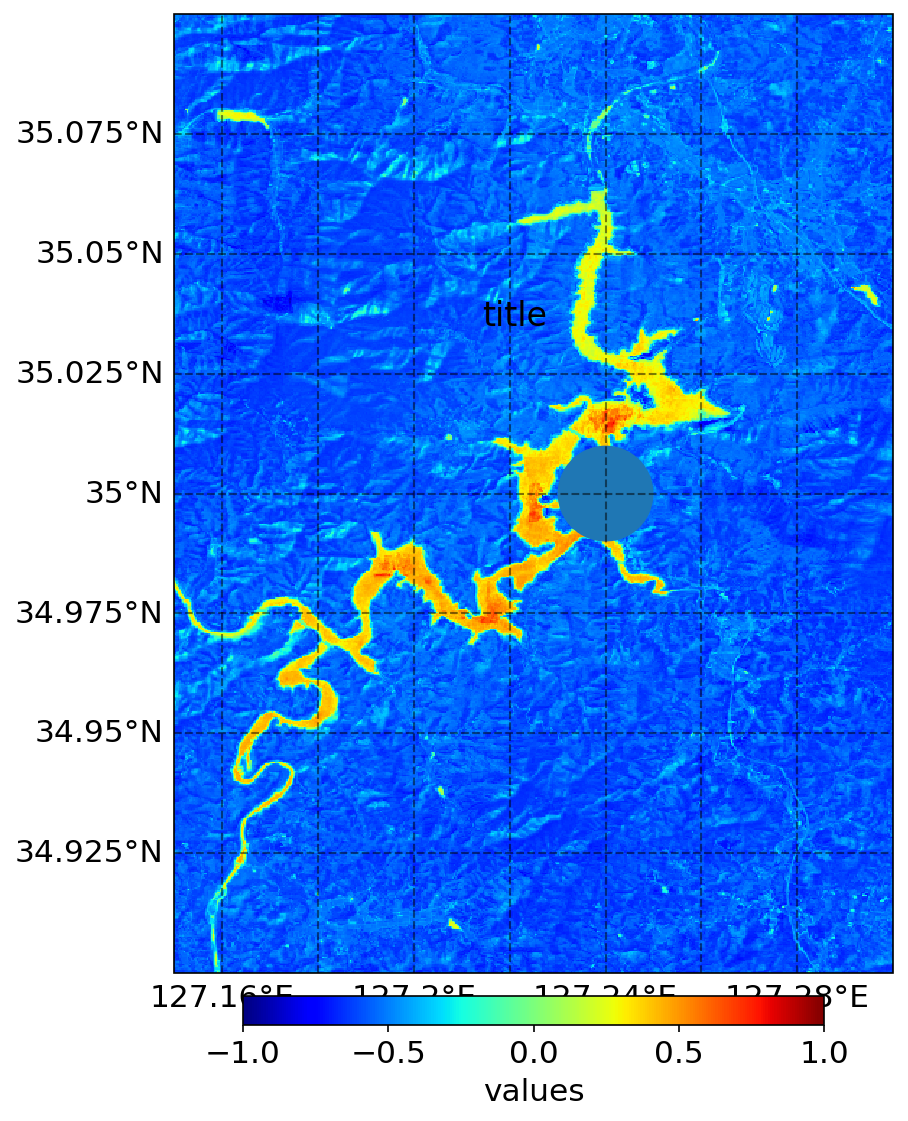

(<Figure size 1500x1500 with 2 Axes>, <GeoAxes: >)

In [71]:
importlib.reload(Plot)
Plot.plot_map(lon, lat, mndwi, -1, 1, plot_title='title', label_title='values', cmap='jet', projection='PlateCarree', bounds=bounds, dem_path=None)